In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de distribución que viene dada por un vector

In [2]:
from scipy.stats import expon
size = 1_000
v = expon.rvs(size=size)

In [3]:
np.mean(v) # media de v
np.median(v) # mediana
np.percentile(v,10) # percentil
np.std(v)

0.957388253637827

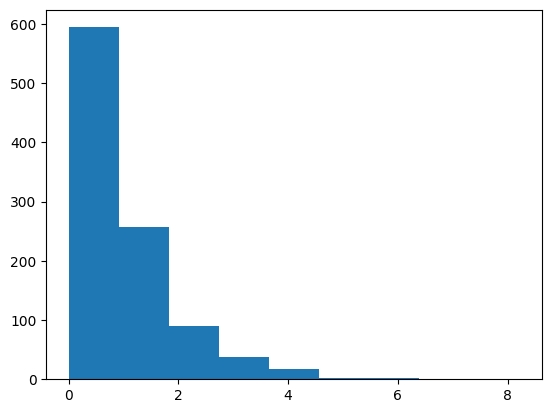

In [4]:
plt.hist(v,bins = 9)
plt.show()

In [5]:
# Probabilidad acumulada: si x es un posible valor
# F(x) te da la probabilidad de que tu variable aleatoria valga menos que x.

si tu variable aleatoria X viene determinada por un vector v, entonces la prbabilidad de que X valga menos qe x es simplemente la cantidad de veces que v es menor que x sobre el total de valores posibles de v

In [6]:
# Acumulada
def F(x):
    return sum(v <= x)/len(v)


In [7]:
v

array([1.15758929e+00, 1.52269080e-01, 3.47422042e-01, 4.56884788e-01,
       2.04538497e+00, 3.37410942e+00, 1.70133385e+00, 1.88620649e-01,
       7.90600039e-01, 1.29431149e-01, 2.68072880e-01, 3.62268364e+00,
       5.46336205e-02, 3.40633621e+00, 1.75080261e-02, 1.89782580e+00,
       1.12549269e+00, 5.90703906e-01, 1.05253582e+00, 4.55868654e-01,
       1.26346152e+00, 1.02470646e+00, 2.28592788e-01, 9.78842485e-01,
       1.60610923e+00, 2.21392997e+00, 3.19591026e-01, 3.06922608e-01,
       5.63739892e-01, 3.34458934e+00, 4.49580014e+00, 1.22462780e+00,
       1.32805845e+00, 1.16977393e+00, 5.73501818e+00, 7.01792500e-01,
       6.18258721e-01, 1.52219613e+00, 7.38427172e-01, 7.24578638e-01,
       1.54037108e+00, 2.32522331e-01, 1.25559330e+00, 6.31165251e-01,
       1.99605760e+00, 7.30127852e-02, 3.19650810e+00, 7.40220831e-01,
       2.01608089e+00, 2.01624510e+00, 3.66569776e-02, 4.19242949e-02,
       9.38562411e-01, 1.35495176e+00, 3.37723246e+00, 7.99096188e-01,
      

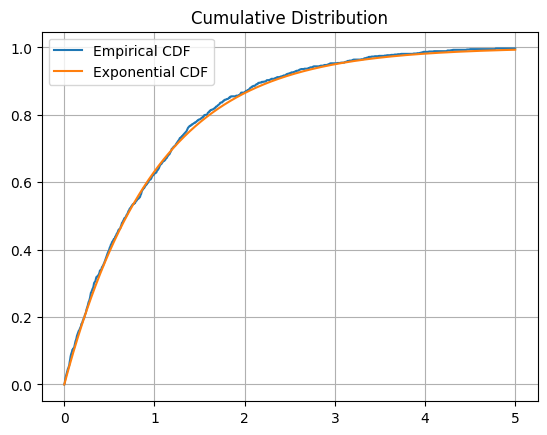

In [8]:

x_values = np.linspace(0, 5, 1000)
y_values = [F(x) for x in x_values] # Ojo con no poner y_values = F(x_values)!

plt.plot(x_values, y_values, label='Empirical CDF')
plt.plot(x_values, expon.cdf(x_values), label="Exponential CDF")
plt.title('Cumulative Distribution')
plt.legend()
plt.grid(True)
plt.show()

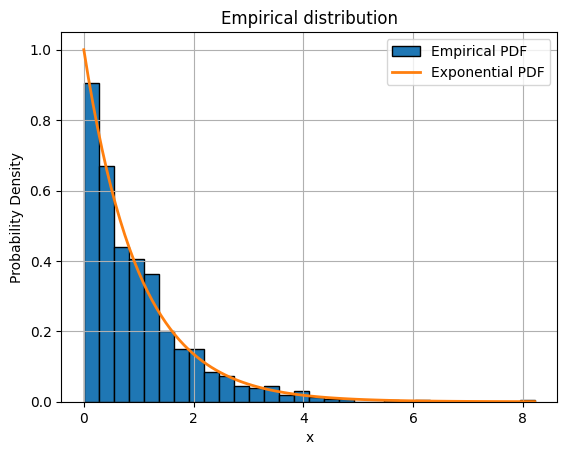

In [9]:
# PDF

plt.hist(v, bins=30, density=True, edgecolor='black', label = "Empirical PDF")

# Plot the theoretical PDF for comparison
x = np.linspace(0, max(v), 100)
plt.plot(x, expon.pdf(x), lw =2, label='Exponential PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Empirical distribution')
plt.legend()
plt.grid(True)
plt.show()

# Grandes números

In [10]:
from scipy.stats import uniform

In [11]:
N = 1_000
x = uniform.rvs(size = N)
y = uniform.rvs(size = N)

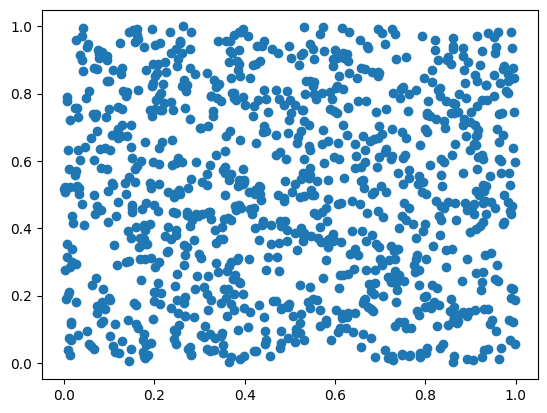

In [12]:
plt.scatter(x=x,y=y)
plt.show()

In [13]:
print((x[0]-1/2)**2+(y[0]-1/2)**2)

0.188183758340765


In [14]:
z = ((x-1/2)**2 + (y-1/2) **2 <= 1/4)
#print(z)
#print(~z)

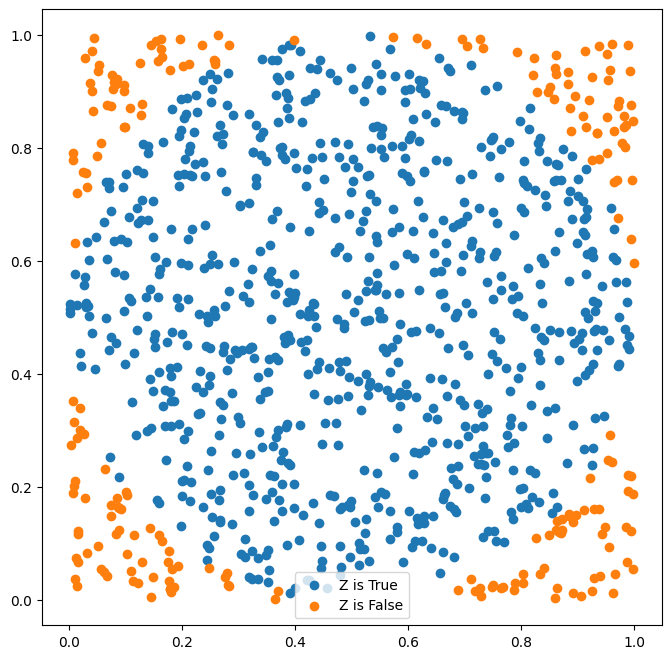

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=x[z], y=y[z], label='Z is True')
ax.scatter(x=x[~z], y=y[~z], label='Z is False')
ax.axis("equal")
ax.legend()
plt.show()


In [32]:
4*sum(z)/N

3.092

In [33]:
def approximate_pi(N):
    x = uniform.rvs(size = N)
    y = uniform.rvs(size = N)
    z = ((x-1/2)**2 + (y-1/2) **2 <= 1/4)
    return 4*sum(z)/N

In [37]:
approximate_pi(10**8)

3.14179064

In [ ]:
10**np.arange(1,6)

array([    10,    100,   1000,  10000, 100000])

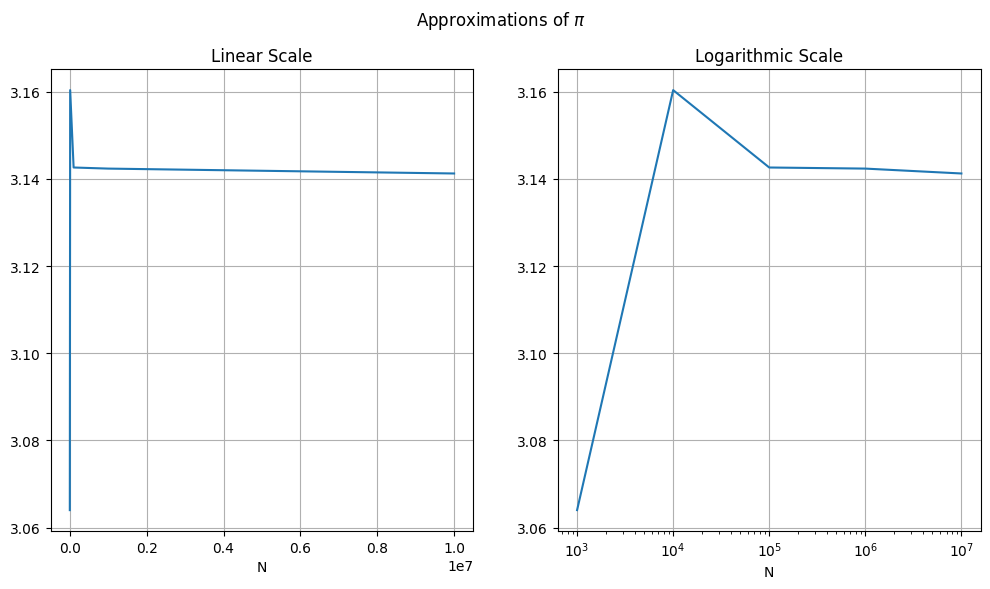

In [38]:
N_values = 10**np.arange(3,8)

# Calculate pi approximation for each N
pi_values = [approximate_pi(N) for N in N_values]

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot with linear scale
axs[0].plot(N_values, pi_values)
axs[0].set_xlabel('N')
axs[0].set_title('Linear Scale')

# Plot with logarithmic scale
axs[1].plot(N_values, pi_values)
axs[1].set_xscale('log')
axs[1].set_xlabel('N')
axs[1].set_title('Logarithmic Scale')

# Add a superior title
fig.suptitle(r'Approximations of $\pi$')

axs[0].grid()
axs[1].grid()
plt.show()

In [ ]:
print("Pero cuál es el error de la aproximación? Qué N elegir?")

Pero cuál es el error de la aproximación? Qué N elegir?


# Teorema Central del límite

In [81]:
x = np.arange(1,10_000)
v = np.cos(x)

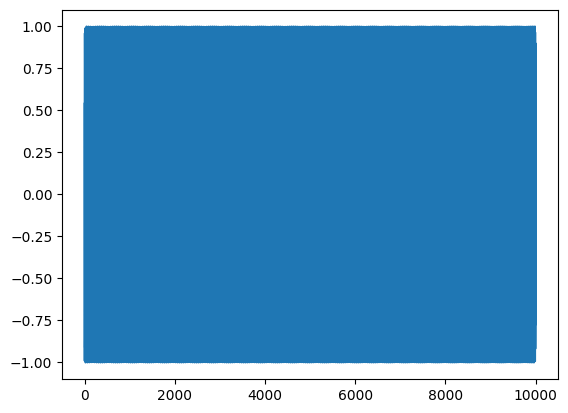

In [82]:
plt.plot(x,v)
plt.show()

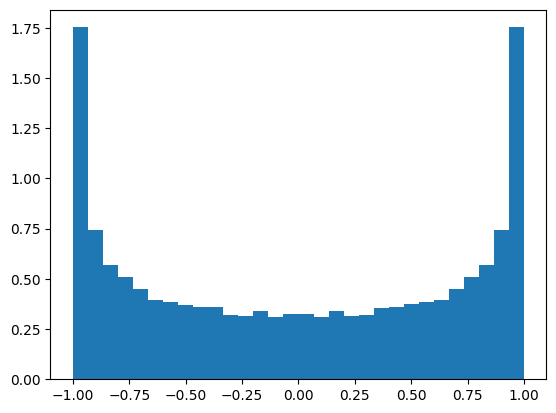

In [83]:
plt.hist(v,density=True,bins = 30)
plt.show()

Partimos de la variable aleatoria $X$ cuya distribución vienee determinada por $v$. Fijemos $k =10$ y consideremos la variable aleatoria $\bar X_k = \frac{1}{k} (X_1+\ldots + X_k)$, donde $X_1,\ldots,X_k$ son vaiid como $X$.

Para tomar un sample de $\bar X_k$ necesito tomar samples de $X_1,\ldots,X_k$, y eso se puede pensar como tomar $k$ samples de $X$, o sea seleccionar al azar $k$ elementos de $v$.

In [84]:
np.random.choice(10,size=3,replace=True)

array([2, 1, 7])

In [85]:
np.random.choice(len(v), size=3, replace=True)

array([6536, 4536, 5059])

In [88]:
v[np.random.choice(len(v), size=3, replace=True)]

array([ 0.36804822, -0.620112  , -0.67384133])

In [89]:
k = 10
this_choice = v[np.random.choice(len(v), size=k, replace=True)]
this_choice_average = np.mean(this_choice)
print(this_choice_average)

-0.042541944958915515


In [90]:

sample_size = 1000
k = 10
average_samples = np.zeros(sample_size)

for i in range(sample_size):
    this_choice = v[np.random.choice(len(v), size=k, replace=True)]
    this_choice_average = np.mean(this_choice)
    average_samples[i] = this_choice_average

# El vector average_samples es una muestra aleatoria de X_k de tamaño sample_size

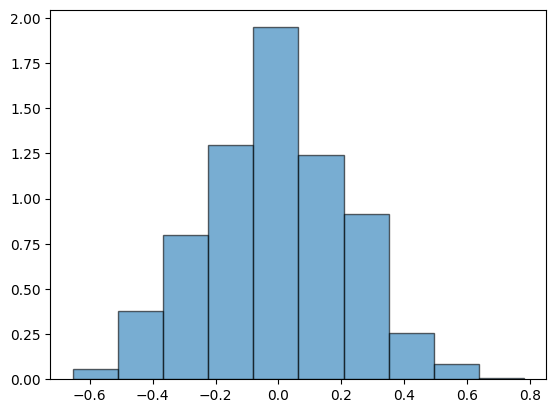

In [91]:
plt.hist(average_samples,density=True, edgecolor = "k", alpha=0.6)
plt.show()

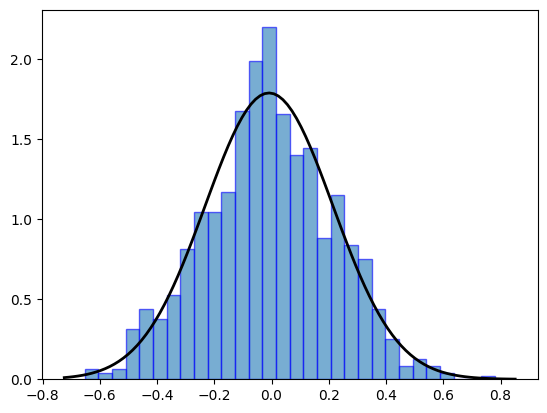

In [93]:
from scipy.stats import norm
mu, std = norm.fit(average_samples)
plt.hist(average_samples, density=True,bins=30, edgecolor = "b", alpha=0.6)

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()


In [94]:
print(mu,std)

-0.008766009519798416 0.22299417357637707


In [95]:
print("Valores de mu y sigma estimados con TCL:")
print(np.mean(v))
print(np.std(v)/np.sqrt(k))

Valores de mu y sigma estimados con TCL:
-3.0366437552734693e-05
0.2235987494798287


# Presión

Se nos ocurre una medicina para bajarle la presión a la gente nerviosa. Nos conseguimos un grupo de gente nerviosa, le aplicamos la medicna y después medimos la presión que tienen. Sabemos, por otra parte, que entre la gente nerviosa la presión suele ser $13$.

In [96]:
results = np.array([
    10,  8, 19,  14,  7,
    15, 10,  9,  9,  9,
    8, 10, 12, 13, 17,
    6, 11,  9,  5, 10,
    11,  7, 11, 11, 10,
    15,  9,  8, 12,  8,
])

Los resultados de recién son samples de la variable aleatoria $Y$, definida por ser la presiôn de un paciente que recibió la medicina.
Vamos a analizar la variable aleatoria $\bar Y$ en lugar de la variable $Y$, porque a $\bar Y$ le podemos tirar con el TCL.

In [97]:
mean_results = np.mean(results)
n = len(results)
sigma_results = np.std(results)

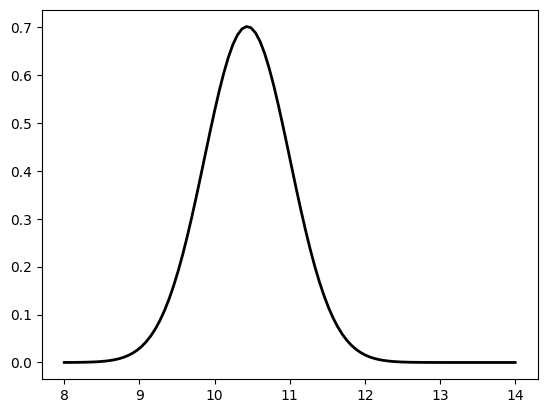

In [98]:
xmin, xmax =[8,14]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_results,sigma_results/np.sqrt(n))
plt.plot(x, p, 'k', linewidth=2)
plt.show()


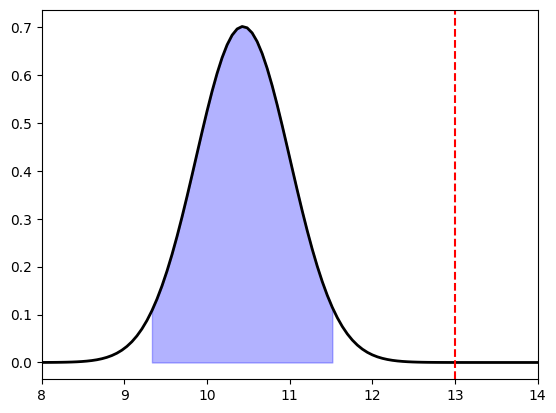

In [99]:
# IC
alpha = 0.05
z = norm.ppf(1 - alpha / 2)
margin_of_error = z * (sigma_results / np.sqrt(n))
lower_bound = mean_results - margin_of_error
upper_bound = mean_results + margin_of_error

# Plot
fig, ax = plt.subplots()
xmin, xmax = [8, 14]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_results, sigma_results / np.sqrt(n))
ax.plot(x, p, 'k', linewidth=2)
ax.fill_between(x, 0, p, where=(x >= lower_bound) & (x <= upper_bound), color='blue', alpha=0.3)
ax.axvline(x=13, color='r', linestyle='--')
ax.set_xlim([xmin, xmax])
plt.show()